In [27]:
import pandas as pd

amazon = 'amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(amazon)

In [28]:
df


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [29]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result['proportion_best_seller'] = crosstab_result[True] / (crosstab_result[True] + crosstab_result[False])

sorted_categories = crosstab_result.sort_values(by='proportion_best_seller', ascending=False)


In [30]:
print("Crosstab between product category and isBestSeller status:")
sorted_categories

Crosstab between product category and isBestSeller status:


isBestSeller,False,True,proportion_best_seller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import cramervonmises

In [32]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

In [33]:
chi2, p, dof, expected = chi2_contingency(crosstab_result)
print("Chi-square test results:")
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square test results:
Chi2 Statistic: 36540.20270061387
p-value: 0.0
Degrees of Freedom: 295
Expected Frequencies Table:
[[2.47190130e+02 8.09870149e-01]
 [4.05371878e+03 1.32812173e+01]
 [2.49183599e+02 8.16401360e-01]
 [1.69145827e+03 5.54173243e+00]
 [2.53170536e+02 8.29463782e-01]
 [8.50214439e+03 2.78556144e+01]
 [1.06650580e+02 3.49419782e-01]
 [2.57157474e+02 8.42526204e-01]
 [9.51781673e+03 3.11832664e+01]
 [1.50008526e+04 4.91473619e+01]
 [9.32544700e+03 3.05530045e+01]
 [2.38219520e+02 7.80479700e-01]
 [3.22941944e+03 1.05805616e+01]
 [9.44704859e+03 3.09514084e+01]
 [6.68808779e+03 2.19122125e+01]
 [5.26275760e+02 1.72423967e+00]
 [1.90296531e+04 6.23469391e+01]
 [2.77191835e+03 9.08164873e+00]
 [2.53170536e+02 8.29463782e-01]
 [4.04674164e+02 1.32583581e+00]
 [1.92489346e+04 6.30653723e+01]
 [3.10482764e+03 1.01723609e+01]
 [2.04330551e+02 6.69449115e-01]
 [6.28839730e+03 2.06027047e+01]
 [5.23385231e+03 1.71476942e+01]
 [9.52180367e+03 3.11963288e+01]
 [2.48186864e+02 8

In [34]:
n_obs = df.shape[0]
v = np.sqrt(chi2 / (n_obs * (min(crosstab_result.shape) - 1)))
print("Cramér's V:", v)

Cramér's V: 0.1222829439760564


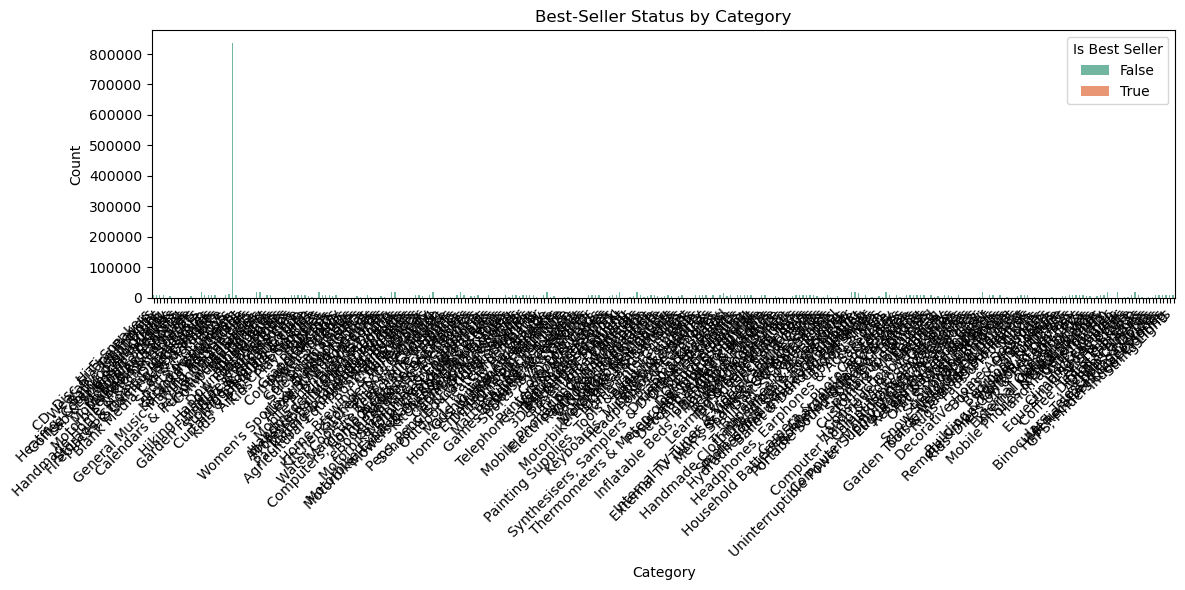

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category', hue='isBestSeller', palette='Set2')
plt.title('Best-Seller Status by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Best Seller', loc='upper right')
plt.tight_layout()
plt.show()

In [36]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

In [37]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
num_outliers_removed = df.shape[0] - df_no_outliers.shape[0]
num_outliers_removed

327688

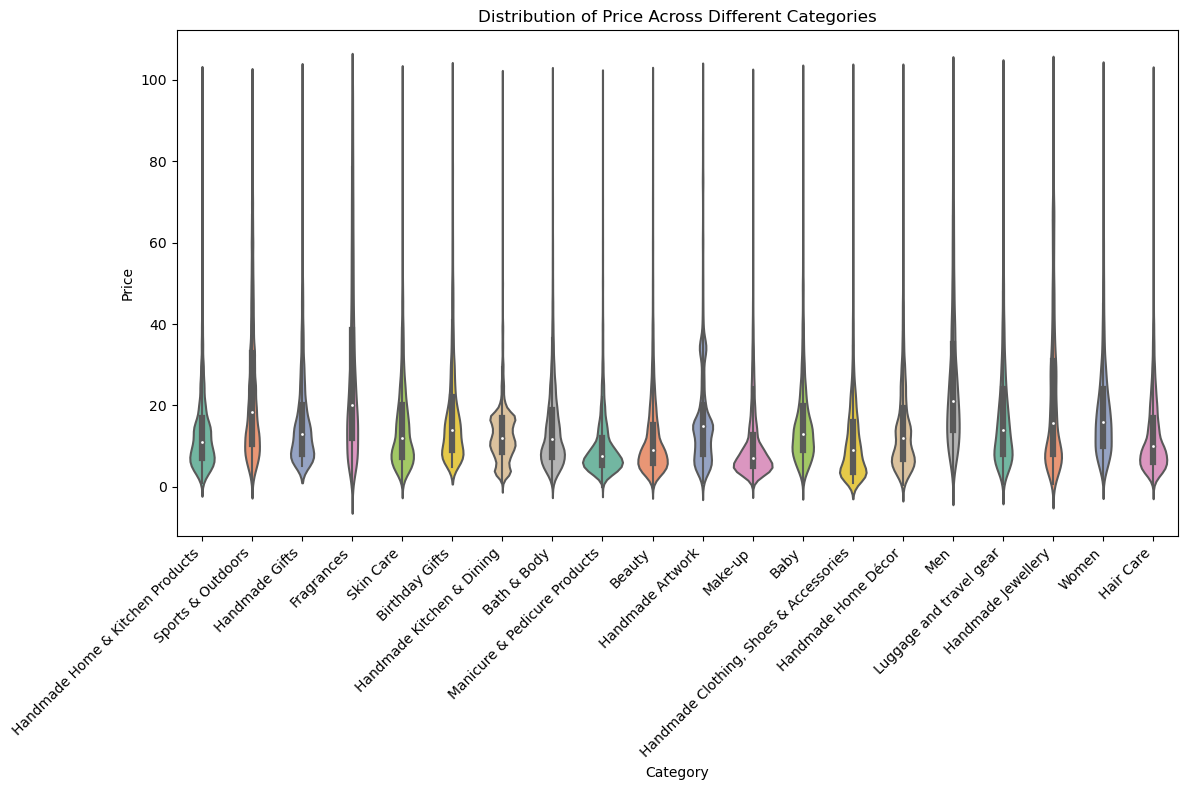

In [38]:
top_categories = df_no_outliers['category'].value_counts().head(20).index
df_filtered = df_no_outliers[df_no_outliers['category'].isin(top_categories)]
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_filtered, x='category', y='price', palette='Set2')
plt.title('Distribution of Price Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

avg_price_by_category = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)

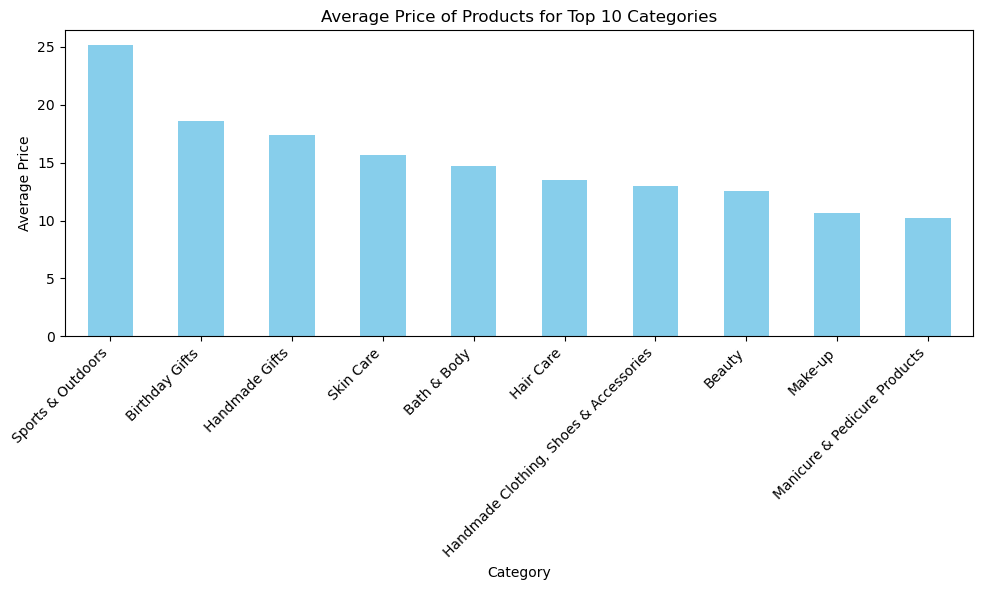

In [40]:
plt.figure(figsize=(10, 6))
avg_price_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Price of Products for Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
highest_avg_price_category = avg_price_by_category.idxmax()
highest_avg_price_category

'Sports & Outdoors'

In [42]:
from scipy.stats import probplot
from scipy.stats import pearsonr  
from scipy.stats import shapiro

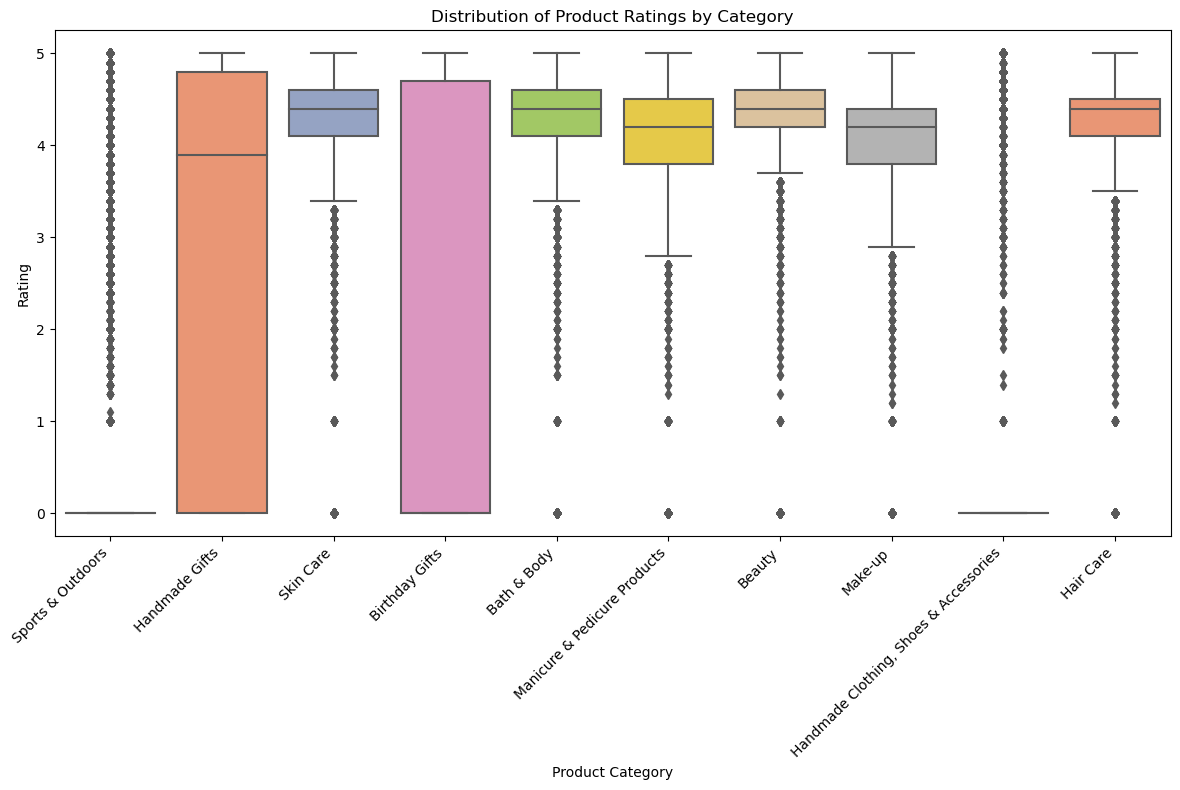

In [43]:
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Create side-by-side box plots to visualize the distribution of product ratings by category
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_10, x='category', y='stars', palette='Set2')
plt.title('Distribution of Product Ratings by Category')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [44]:
df_no_outliers['pric'] = pd.to_numeric(df_no_outliers['price'], errors='coerce')
df_no_outliers['stars'] = pd.to_numeric(df_no_outliers['stars'], errors='coerce')
df_no_outliers.dropna(subset=['price', 'stars'], inplace=True)

numeric_prices = pd.to_numeric(df_no_outliers['price'], errors='coerce')

mean_price = np.nanmean(numeric_prices)

df_no_outliers['price'] = numeric_prices.fillna(mean_price)

correlation_coefficient, p_value = pearsonr(df_no_outliers['price'], df_no_outliers['stars'])
print("Correlation coefficient between price and stars:", correlation_coefficient)
print("p-value:", p_value)






C:\Users\joaop\AppData\Local\Temp\ipykernel_21296\4203818650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['pric'] = pd.to_numeric(df_no_outliers['price'], errors='coerce')
C:\Users\joaop\AppData\Local\Temp\ipykernel_21296\4203818650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['stars'] = pd.to_numeric(df_no_outliers['stars'], errors='coerce')


Correlation coefficient between price and stars: -0.07767299878181351
p-value: 0.0


C:\Users\joaop\AppData\Local\Temp\ipykernel_21296\4203818650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(subset=['price', 'stars'], inplace=True)
C:\Users\joaop\AppData\Local\Temp\ipykernel_21296\4203818650.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['price'] = numeric_prices.fillna(mean_price)


In [45]:
print(df_no_outliers.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2115963 entries, 0 to 2443650
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
 9   pric               float64
dtypes: bool(1), float64(3), int64(3), object(3)
memory usage: 163.5+ MB
None


In [46]:
non_numeric_prices = df_no_outliers[pd.to_numeric(df_no_outliers['price'], errors='coerce').isna()]
non_numeric_stars = df_no_outliers[pd.to_numeric(df_no_outliers['stars'], errors='coerce').isna()]
print('Rows with non-numeric "price":'," non_numeric_prices")
print('Rows with non-numeric "stars":', "non_numeric_stars")

numerical_df = df_no_outliers.select_dtypes(include=['float64', 'int64'])

Rows with non-numeric "price":  non_numeric_prices
Rows with non-numeric "stars": non_numeric_stars


In [47]:
correlation_coefficient, p_value = pearsonr(df_no_outliers['price'], df_no_outliers['stars'])
print("Correlation coefficient between price and stars:", "correlation_coefficient")
print("p-value:", p_value)

Correlation coefficient between price and stars: correlation_coefficient
p-value: 0.0


Correlation coefficient between price and stars: -0.07767299878181351
p-value: 0.0
There is a significant correlation between product price and its rating.


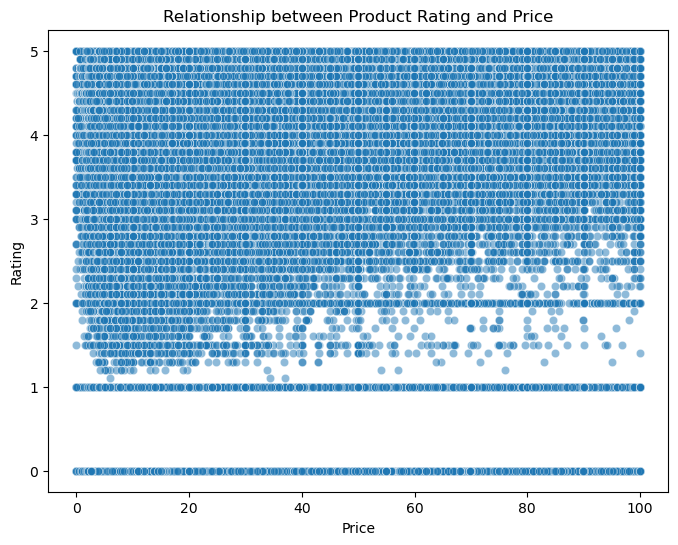

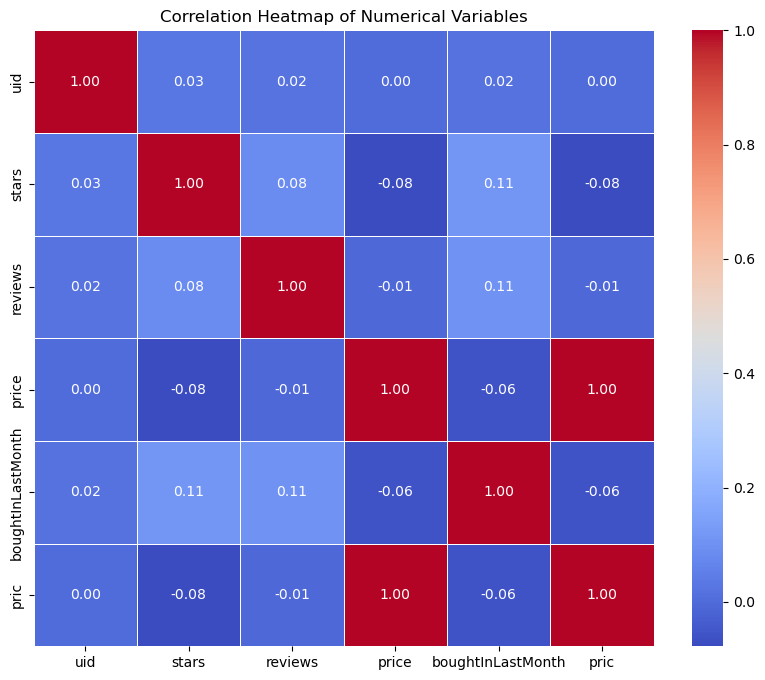

Shapiro-Wilk test statistic for normality of product prices: 0.813258171081543
p-value: 0.0


c:\Users\joaop\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [48]:
correlation_coefficient, p_value = pearsonr(numerical_df['price'], numerical_df['stars'])
print("Correlation coefficient between price and stars:", correlation_coefficient)
print("p-value:", p_value)


alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation between product price and its rating.")
else:
    print("There is no significant correlation between product price and its rating.")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=numerical_df, x='price', y='stars', alpha=0.5)
plt.title('Relationship between Product Rating and Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()
shapiro_test_statistic, shapiro_p_value = shapiro(numerical_df['price'])
print("Shapiro-Wilk test statistic for normality of product prices:", shapiro_test_statistic)
print("p-value:", shapiro_p_value)

<Figure size 1000x600 with 0 Axes>

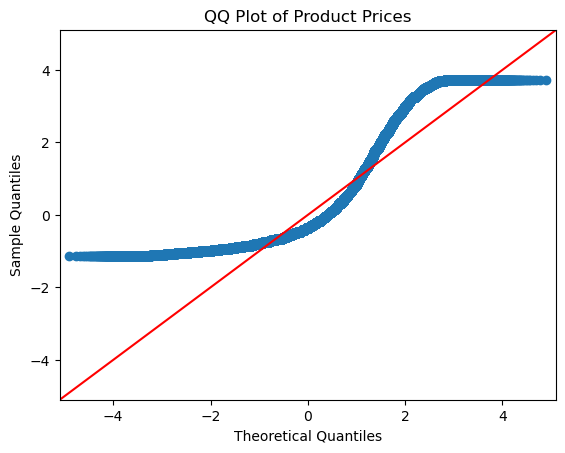

In [50]:
import statsmodels.api as sm


plt.figure(figsize=(10, 6))
sm.qqplot(df_no_outliers['price'], line ='45', fit=True)
plt.title('QQ Plot of Product Prices')
plt.show()